## Diamond Price Predictor 


### Importing Libraries 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

### Reading file using pandas

In [3]:
filepath = 'diamonds.csv'
diamonds_data = pd.read_csv(filepath, index_col=0)

In [4]:
diamonds_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds_data.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


### Handling Missing Data 

In [6]:
diamonds_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No missing data is found in this dataset, we can easily skip this step

In [7]:
def num_outliers(dataframe, features):
    outliers = []
    percentage = []
    for feature in features:
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1
        # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
        filtered = dataframe.query('(@Q1 - 1.5 * @IQR) <= '+ feature +' <= (@Q3 + 1.5 * @IQR)')
        n = len(dataframe.index)-len(filtered.index)
        npercent = (n* 100)/len(dataframe.index)
        outliers.append(n)
        percentage.append(npercent)
    return list(zip(features,outliers,percentage))

In [8]:
num_outliers(diamonds_data,['carat','depth','table','price','x','y','z'])

[('carat', 1889, 3.5020393029291808),
 ('depth', 2545, 4.7182054134223215),
 ('table', 605, 1.121616611049314),
 ('price', 3540, 6.562847608453837),
 ('x', 32, 0.05932517612161661),
 ('y', 29, 0.053763440860215055),
 ('z', 49, 0.09084167593622544)]

### Handling Outliers

In [9]:
def remove_outliers(dataframe, features):
    for feature in features:
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1
        # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
        filtered = dataframe.query('(@Q1 - 1.5 * @IQR) <= '+ feature +' <= (@Q3 + 1.5 * @IQR)')
        dataframe = filtered
    return dataframe

In [10]:
diamonds_data = remove_outliers(diamonds_data,['carat','depth','table','price','x','y','z'])

### Dealing with Categorical Variables

In [11]:
object_cols = [col for col in diamonds_data.columns if diamonds_data[col].dtype == 'object']
object_cols

['cut', 'color', 'clarity']

In [12]:
object_unique = list(map(lambda col: diamonds_data[col].unique(), object_cols))
d = dict(zip(object_cols,object_unique))
d

{'cut': array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object),
 'color': array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object),
 'clarity': array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
       dtype=object)}

In [13]:
cut_dict = {'Ideal' : 5, 'Premium' : 4, 'Good' : 2, 'Very Good' : 3, 'Fair' : 1}
color_dict = {'E' : 6, 'I' : 2, 'J' : 1, 'H' : 3, 'F' : 5, 'G' : 4, 'D' : 7}
clarity_dict = {'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VVS2' : 6, 'VVS1' : 7, 'VS1' : 5, 'I1' : 1, 'IF' : 8}

In [14]:
def change_labels(dataframe, features_dict):
    for feature in features_dict:
        f_dict = features_dict[feature]
        dataframe[feature] = [f_dict[item] for item in dataframe[feature]]
    return dataframe
    

In [15]:
change_labels(diamonds_data, {'cut':cut_dict, 'color': color_dict, 'clarity': clarity_dict})

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


### Finding Correlation 

<AxesSubplot:>

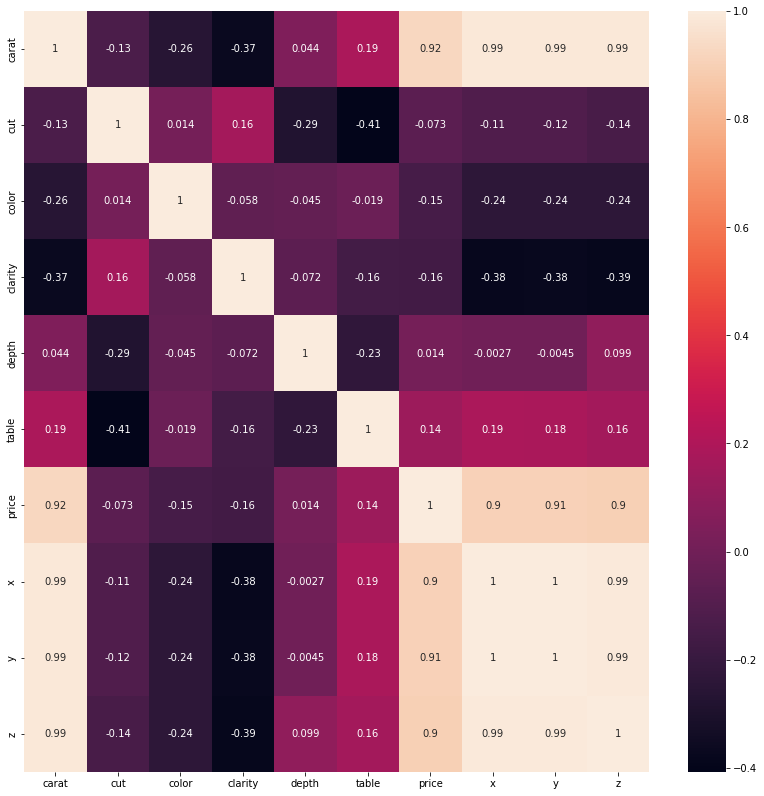

In [16]:
plt.figure(figsize=(14,14))
sns.heatmap(diamonds_data.corr(), annot = True)

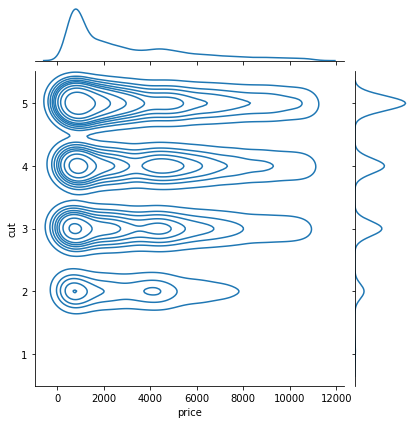

In [17]:
sns.jointplot(x = 'price', y='cut', data = diamonds_data, kind='kde')

In [18]:
y = diamonds_data.price
X = diamonds_data.drop(['price'], axis = 1)

### Machine Learning

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [21]:
regressors = {'RandomForestRegressor' : RandomForestRegressor(), 
              'GradientBoostingRegressor' : GradientBoostingRegressor(),
              'LinearRegression' : LinearRegression(),
              'XGBRegressor' : XGBRegressor(),
              'DecisionTreeRegressor' : DecisionTreeRegressor(), 
              'KNeighborsRegressor' : KNeighborsRegressor()}

In [22]:
from sklearn.metrics import mean_absolute_error

In [23]:
for model in regressors.keys():
    regressors[model].fit(X_train, y_train)
    prediction = regressors[model].predict(X_val)
    score = mean_absolute_error(y_val, prediction)
    print(model,score)

RandomForestRegressor 190.096896930357
GradientBoostingRegressor 229.1645803219115
LinearRegression 528.5768585254713
XGBRegressor 193.94263720784974
DecisionTreeRegressor 252.66092151637582
KNeighborsRegressor 334.341992607238


In [24]:
regressors['RandomForestRegressor']

RandomForestRegressor()

In [1]:
from joblib import dump, load

In [25]:
dump(regressors['RandomForestRegressor'], 'diamond_predictor.joblib')

['diamond_predictor.joblib']

In [26]:
clf = load('diamond_predictor.joblib') 

In [27]:
type(clf)

sklearn.ensemble._forest.RandomForestRegressor

In [40]:
a = clf.predict(X_val)
b = regressors['RandomForestRegressor'].predict(X_val)

In [41]:
a==b

array([ True,  True,  True, ...,  True,  True,  True])

In [44]:
clf.predict([X_val.iloc[0]])

array([5795.05])

In [45]:
X_val.iloc[0]

carat       1.07
cut         5.00
color       5.00
clarity     3.00
depth      59.40
table      57.00
x           6.73
y           6.67
z           3.98
Name: 13138, dtype: float64